## Assignment Question 1: Logistic Regression with Scikit-Learn (5 Marks)

<b> Question: </b>

You are provided with the Pima Indians Diabetes dataset, a dataset that contains several medical predictor variables and one target variable indicating whether or not a patient has diabetes. Your task is to use the Logistic Regression algorithm to predict whether a patient has diabetes based on the provided features <b> using the scikit-learn library. </b>

Instructions:

<b> 1. Data Loading and Preparation: </b> [1 mark]

- Use the dataset available at this Kaggle link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

- Ensure the dataset is properly split into features (X) and target (y).

- Perform feature scaling using 'StandardScaler' to normalize the features for better performance of the logistic regression model.


<b> 2. Model Implementation: </b> [2 marks]

- Split the dataset into training and testing sets (e.g., 80% training, 20% testing) using train_test_split.
- Implement the Logistic Regression classifier using 'sklearn.linear_model.LogisticRegression'.
- Train the Logistic Regression model on the training set.


<b> 3. Evaluation: </b>  [1.5 marks]

- Evaluate the model's performance on the test set using accuracy, precision, recall, and F1-score.
- Present a classification report and a confusion matrix for the results.

<b> 4. Submission Requirements: </b> [0.5 mark]

- Submit the Python code implementing the solution.
- Provide a brief report (300-500 words) explaining your approach, the preprocessing steps, feature scaling importance, and the results obtained.




In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
143,10,108,66,0,0,32.4,0.272,42,1
320,4,129,60,12,231,27.5,0.527,31,0
16,0,118,84,47,230,45.8,0.551,31,1
730,3,130,78,23,79,28.4,0.323,34,1
706,10,115,0,0,0,0.0,0.261,30,1
251,2,129,84,0,0,28.0,0.284,27,0
111,8,155,62,26,495,34.0,0.543,46,1
78,0,131,0,0,0,43.2,0.270,26,1
492,4,99,68,38,0,32.8,0.145,33,0
421,2,94,68,18,76,26.0,0.561,21,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Target looks like classification


c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 1 outliers in column Insulin.
  warn("Dropped {} outliers in column {}.".format(
c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 1 outliers in column SkinThickness.
  warn("Dropped {} outliers in column {}.".format(
c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


Linear Discriminant Analysis training set score: 0.737


c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Outcome'>,
 [<Figure size 1600x400 with 8 Axes>,
  array([[<Axes: title={'center': '0.721'}, xlabel='Glucose', ylabel='DiabetesPedigreeF...'>,
          <Axes: title={'center': '0.699'}, xlabel='Glucose', ylabel='BMI'>,
          <Axes: title={'center': '0.690'}, xlabel='BMI', ylabel='Age'>,
          <Axes: title={'center': '0.682'}, xlabel='Glucose', ylabel='BloodPressure'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

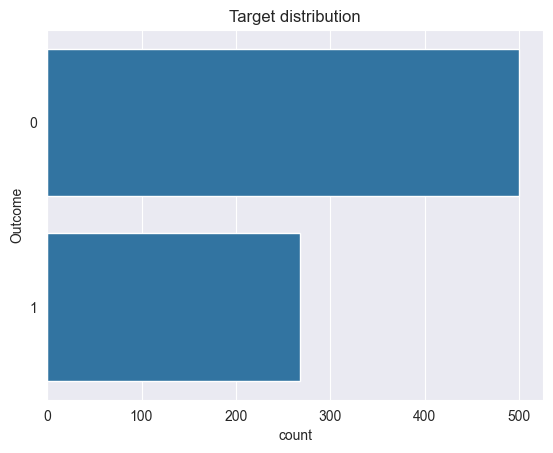

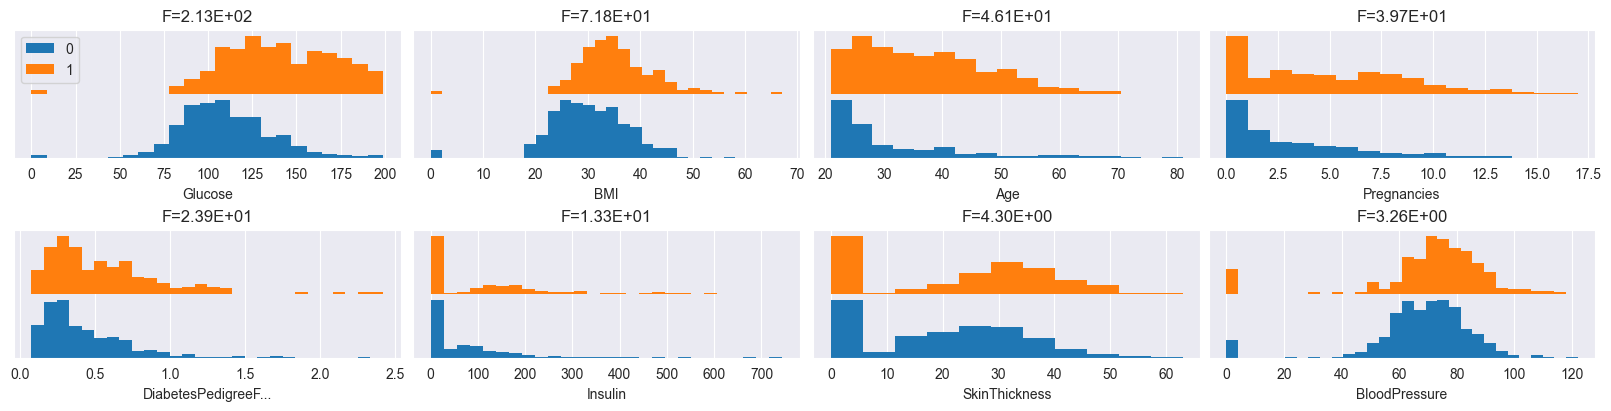

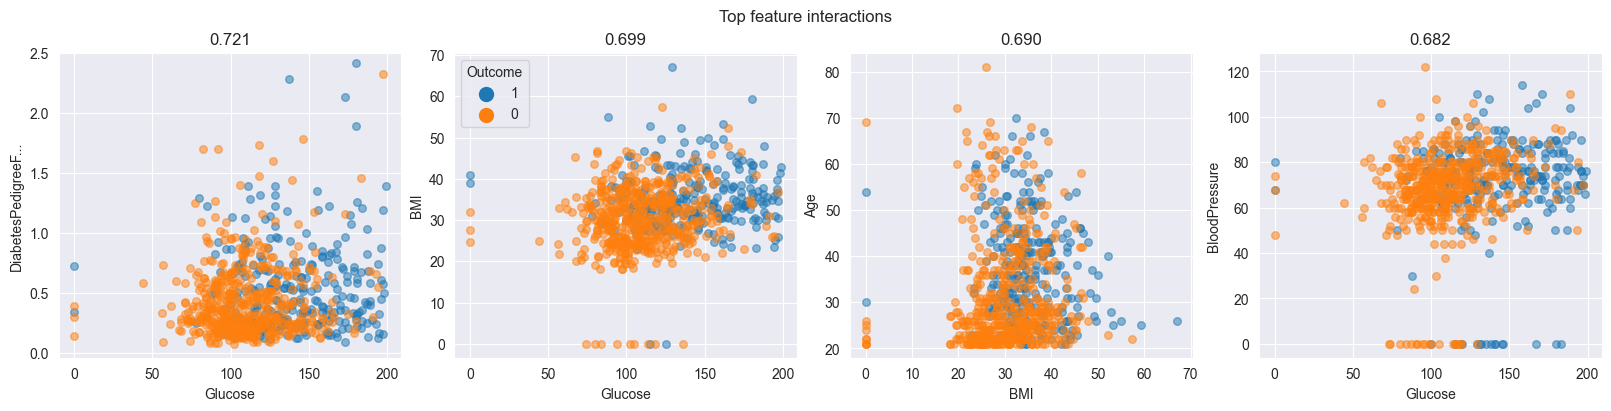

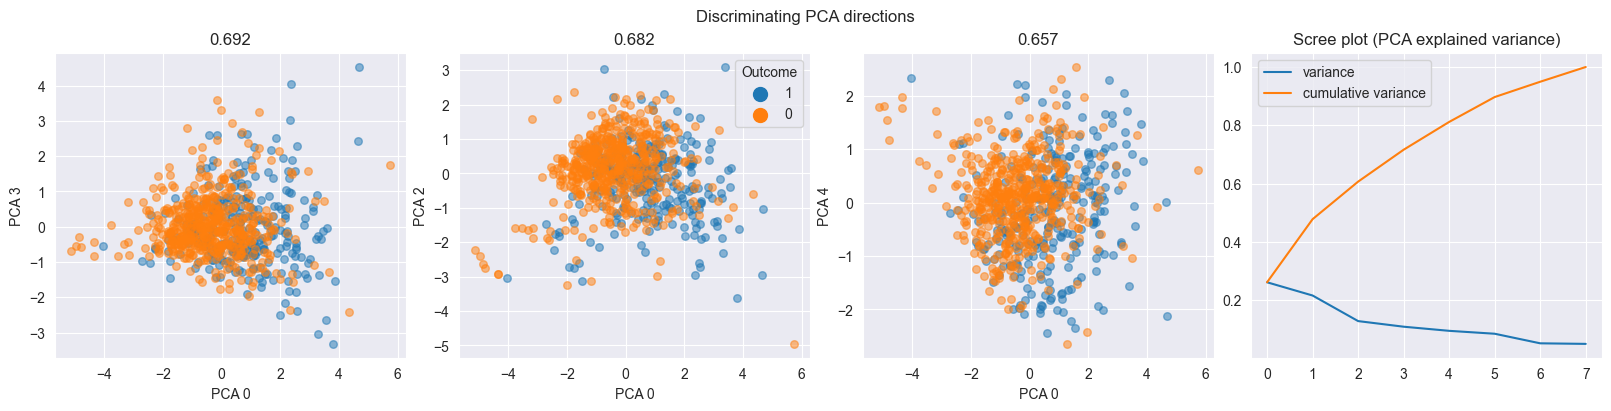

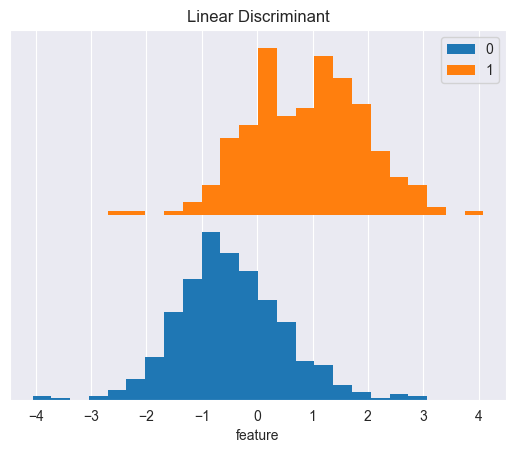

In [7]:
df.corr()

import dabl

dabl.plot(df, target_col='Outcome')

Text(0.5, 1.0, 'Correlation matrix of the diabetes dataset')

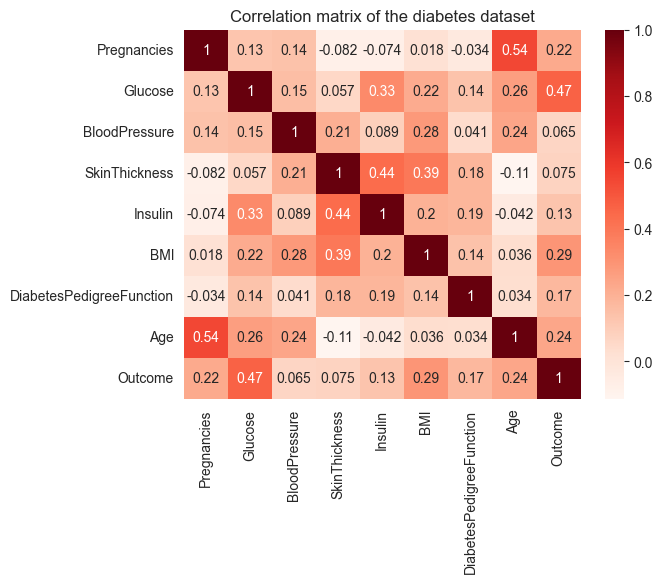

In [11]:
sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.title("Correlation matrix of the diabetes dataset")

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=69)

X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 8), (614, 8), (154, 8), (614,), (154,))

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [14]:
scaler.mean_, scaler.var_

(array([  3.83876221, 120.32410423,  68.98697068,  20.42833876,
         75.60749186,  31.88289902,   0.47877687,  33.24429967]),
 array([1.08095073e+01, 1.02171743e+03, 3.82058462e+02, 2.56853985e+02,
        1.20990691e+04, 6.33979649e+01, 1.12837467e-01, 1.36572239e+02]))

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression().fit(X_train, y_train)

y_predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [18]:
cf_matrix = confusion_matrix(y_test, y_predictions)

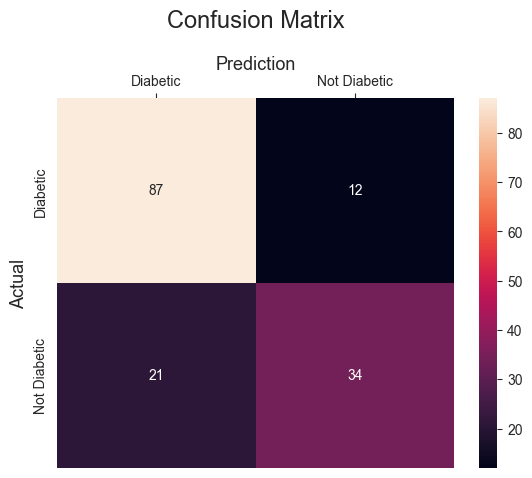

In [19]:
sns.heatmap(cf_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])
plt.title('Confusion Matrix', fontsize=17, pad=20)

plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction', fontsize=13)

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.show()

## Report on Approach

In this assignment, I used Logistic Regression to predict whether patients have diabetes, based on several medical predictor variables. Below is a simple explanation of my steps:

<b style="font-size: 1.2rem">1. `Data Loading and Exploration`</b>
<p style="font-size: 1rem;">I began by loading the dataset using Pandas and checked the data structure. The dataset contains various features, such as glucose levels, BMI, and insulin levels, which can help in predicting diabetes. I briefly inspected the dataset by checking its info and sampling some rows.</p>

<b style="font-size: 1.2rem">2. `Correlation Analysis`</b>
<p style="font-size: 1rem;">Next, I calculated the correlation between the features to understand how they relate to each other and the target variable (whether a patient has diabetes). This was visualized using a heatmap, which gave me an overview of the relationships. Features like glucose had a strong correlation with the outcome, making them important for prediction.</p>

<b style="font-size: 1.2rem">3. `Data Preprocessing`</b>
<p style="font-size: 1rem;">I split the dataset into training and testing sets (80% training, 20% testing) to evaluate the model’s performance on unseen data. To ensure the model works effectively, I standardized the feature values using StandardScaler. This step helps by normalizing the data, ensuring that no single feature dominates the prediction due to its scale.</p>

<b style="font-size: 1.2rem">4. `Model Implementation`</b>
<p style="font-size: 1rem;">Using the Logistic Regression model from Scikit-Learn, I trained the model on the scaled training data. After training, I used the test data to evaluate the model’s predictions.</p>

<b style="font-size: 1.2rem">5. `Evaluation`</b>
<p style="font-size: 1rem;">To assess the model’s performance, I used metrics such as F1-score, precision, recall, and accuracy. The classification report showed that the model performed reasonably well, especially considering this is a binary classification problem. I also plotted a confusion matrix to visualize where the model did well and where it made mistakes.</p>

#### Conclusion
<p style="font-size: 1rem;">Overall, Logistic Regression provided good results, with features like glucose playing a critical role in predicting diabetes. Standardization and proper evaluation helped ensure that the model was fair and accurate.</p>